# Scale free and random networks
## Group assignment

Vsevolod suschevskiy
Samuele Peruzzo

In [4]:
#import packages
import networkx as nx
import pandas as ps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import nbconvert


In [22]:
#pip install nbopen
#import nbopen
#!python -m nbopen.install_win

#!pip install nbconvert

  ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex


In [6]:
#def draw(G, pos, measures):
#    
##    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
 #                                  node_color=measures.values(),
 ##                                  nodelist=measures.keys())
   # nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
  # 
    # labels = nx.draw_networkx_labels(G, pos)
 #   edges = nx.draw_networkx_edges(G, pos)
#
   # plt.colorbar(nodes)
  #  plt.axis('off')
   #plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


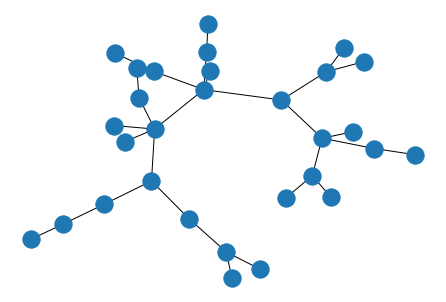

In [7]:
G = nx.barabasi_albert_graph(n = 30, m = 1)
nx.draw_spring(G)

Simple pref attachment graph, better to start with it

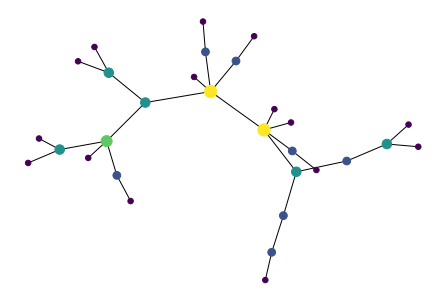

In [8]:
degs = list(nx.degree(G))
pos = nx.spring_layout(G)
sizes = [] #An empty list

sizes = []
for s in degs:
        sizes.append(s[1]*30)

nx.draw(G, pos, node_color = sizes, node_size = sizes)

Color and nodesize is degree, so more degree, less nodes with that degree

<BarContainer object of 30 artists>

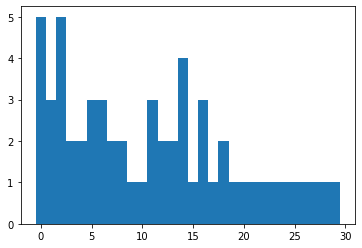

In [9]:
#degs
top=degs
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
plt.bar(xs, ys, 1)

Yep, kinda simular to a Zipf's law

For a nex pre experimant I will create super big network, and visualize all nodes degree

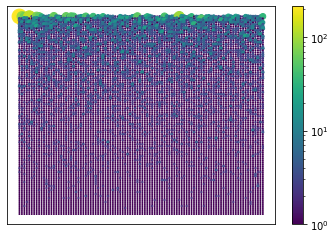

In [10]:
n = 10000 # Number of nodes
m = 1  # Number of initial links
seed = 1
G = nx.barabasi_albert_graph(n, m, seed)

ncols = 100
pos = {i : (i % ncols, (n-i-1)//ncols) for i in G.nodes()}

fig, ax = plt.subplots()
degrees = G.degree() #Dict with Node ID, Degree
nodes = G.nodes()
n_color = np.asarray([degrees[n] for n in nodes])
sc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=n_color, cmap='viridis',
                            with_labels=False, ax=ax, node_size=n_color)
# use a log-norm, do not see how to pass this through nx API
# just set it after-the-fact
sc.set_norm(mcolors.LogNorm())
fig.colorbar(sc)

Only small amount of nodes recieve a huge degree, while most of nodes have only one link

Thus, we see the pure power law, in which only in the upper left corner there are nodes with a large number of links (more than 100), and most of the visualization is occupied by nodes with only 1 link.

In [11]:
    G_small = nx.barabasi_albert_graph(n = 30, m = 1 , seed = 1)
    
    degs = list(nx.degree(G_small))
    #btws = nx.betweenness_centrality(G_small)
    
    btws = nx.betweenness_centrality(G_small)
    nodes = G_small.nodes()
    n_color = np.asarray([btws[n] for n in nodes])


betwenneess distributed the same way as degree

next setting fo a experiment include changing only 1 parameter at time, with other being as control

In this experiment, we posed several research questions:
how the distribution of degree is affected by the number of nodes in the network, (__N__)
and how betweenness is affected by an increase in the number of links for each node.(__M__)

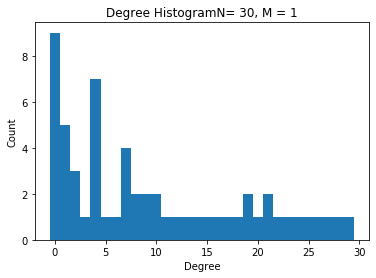

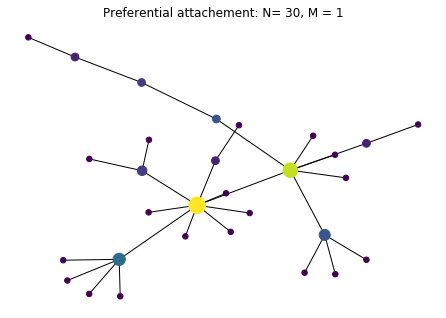

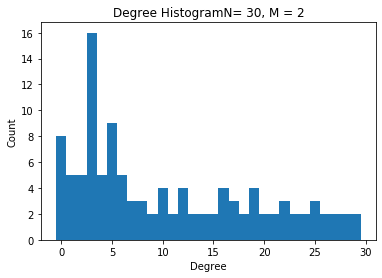

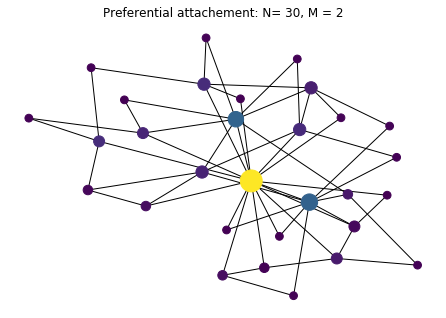

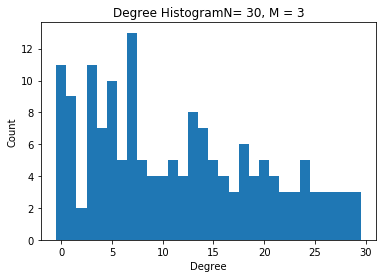

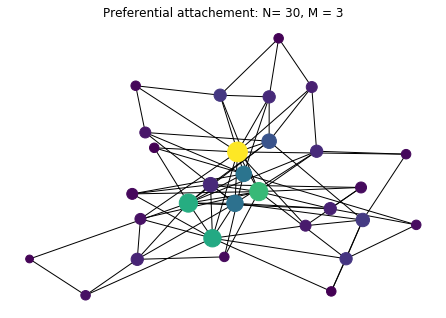

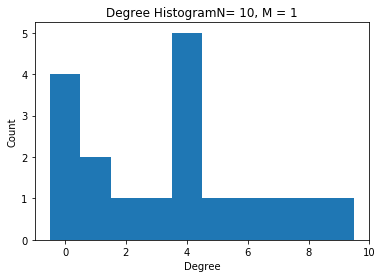

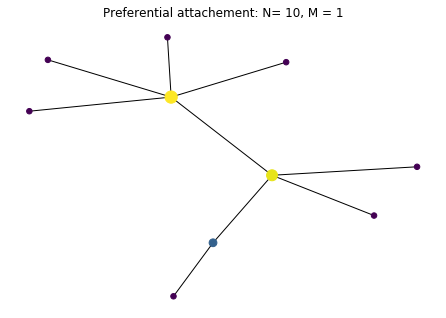

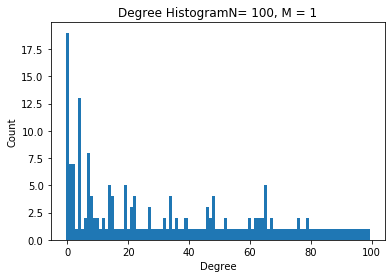

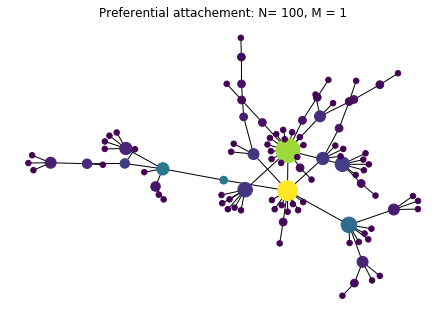

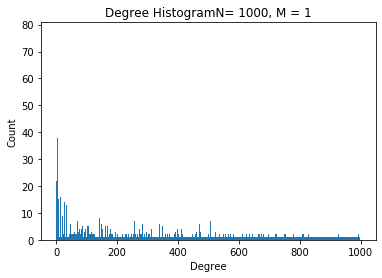

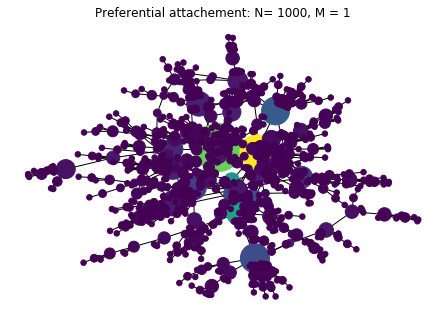

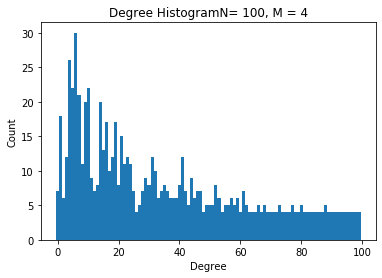

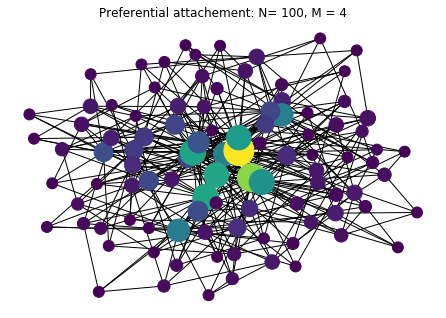

In [10]:
number = [(30, 1), (30, 2), (30, 3), (10, 1), (100, 1), (1000, 1), (100, 4)]

for n, m in number:
    G_small = nx.barabasi_albert_graph(n = n, m = m , seed = 1)
    
    degs = list(nx.degree(G_small))

    
     #Dict with Node ID, Degree
    btws = nx.betweenness_centrality(G_small)
    nodes = G_small.nodes()
    n_color = np.asarray([btws[n] for n in nodes])
    
    top=degs 
    labels, ys = zip(*top)
    xs = np.arange(len(labels)) 
    plt.figure()
    plt.bar(xs, ys, 1)
    plt.title('Degree HistogramN= {}, M = {}'.format(n, m))
    plt.ylabel("Count")
    plt.xlabel("Degree")
       
    sizes = []
    for s in degs:
            sizes.append(s[1]*30)
            
    plt.figure()    
    nx.draw_spring(G_small, node_size = sizes, node_color = n_color)
    plt.title('Preferential attachement: N= {}, M = {}'.format(n, m))

Overall, settings of visualizations conclude nodesize -- degree, nodecolor -- betweenness
With network size of 30 nodes we increase density and strength of preferential attachment (M attribute), so rich club does not really change, only average degree increases.

Network size (N ) affect only on the degree of the "richest" node, inequality increases. Same for betweenness.

M = 4 shifts slope of a degree distribution to the right. So the mode of a distribution is less positively skew, and situated near 3 or 4 degrees.

thus, increasing the number of nodes in the network affects the maximum possible degree, and increasing number of connection per node, changes structure of network, making it much more dense, while power low distribution of degree keeps the same. However, there is no more importance of hub nodes, so cut network is reall hard.


## erdos_renyi_graph 

n -- number of nodes,
p-- probability of a link
graph is random, so it could create isolated nodes, and degree distribution sopposed to be normal

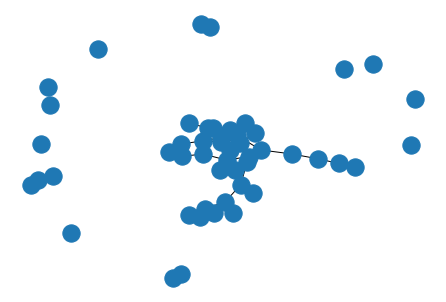

In [20]:
G = nx.erdos_renyi_graph(n = 50, p = 0.05)
nx.draw_spring(G)

Graph is random, so it could create isolated nodes, and degree distribution is supposed to be normal (or at least uniformal).
Graph shows absolute random nature, without structurally meaningfull features. 
Each node and P chance to create a link with any other node. So P (5%) is a network density 

In the next experiment we tried to analyze the distribution of degree (as dependent variable) and density and amount of nodes, as independent 
For each settings only 1 attribute was changed

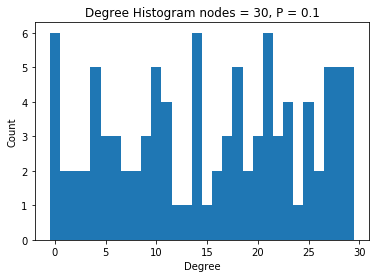

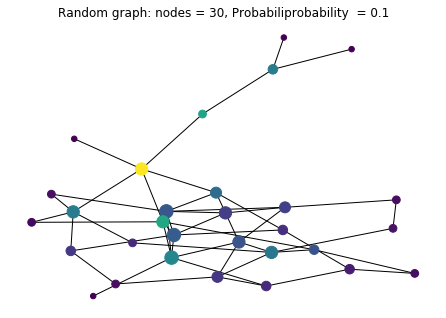

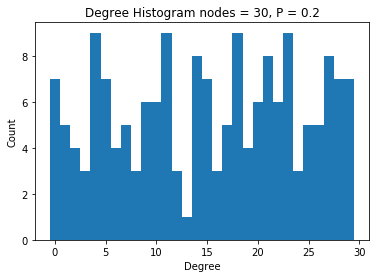

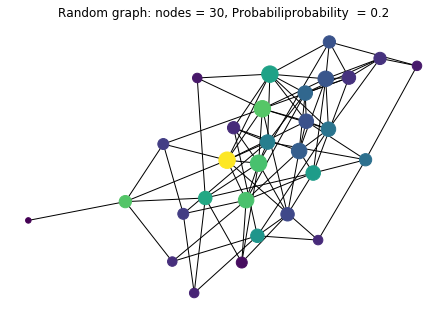

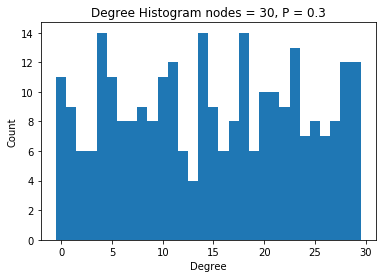

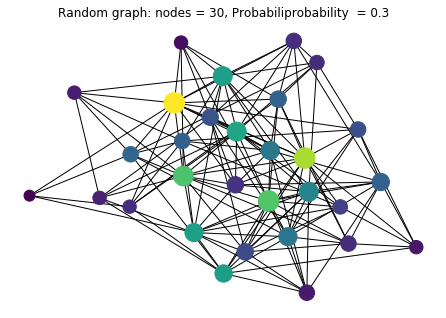

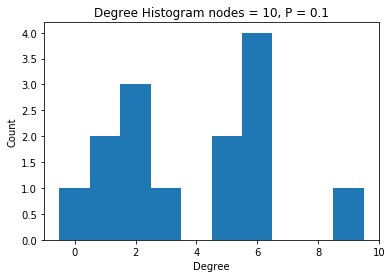

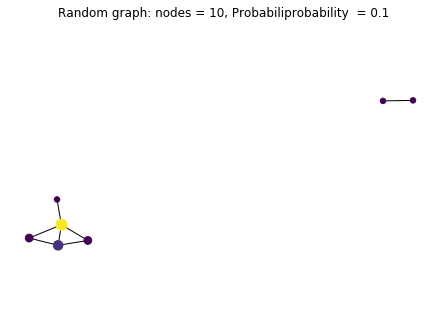

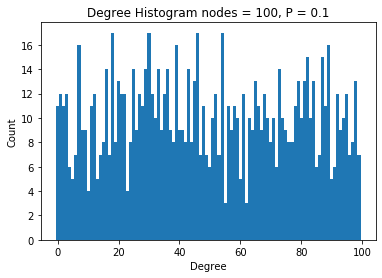

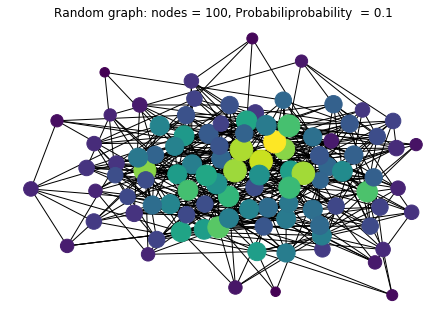

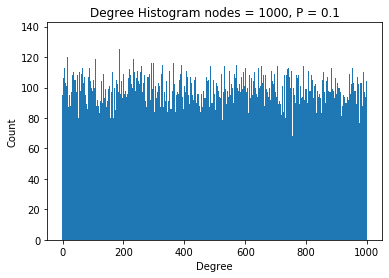

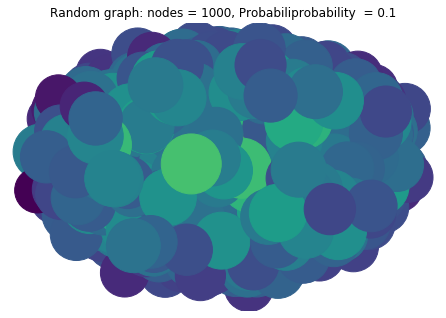

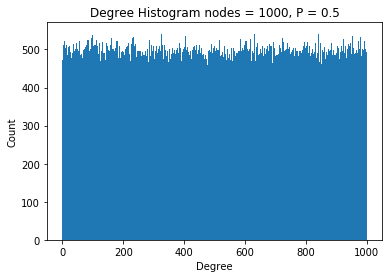

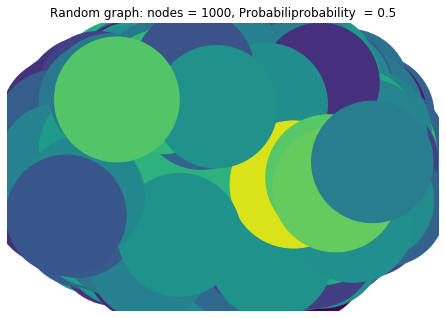

In [34]:
number = [(30, 0.1), (30, 0.2), (30, 0.3), (10, 0.1), (100, 0.1), (1000, 0.1), (1000, 0.5)]

for n, m in number:
    G_small = nx.erdos_renyi_graph(n = n, p = m , seed = 1)
    
    degs = list(nx.degree(G_small))

    
     #Dict with Node ID, Degree
    btws = nx.betweenness_centrality(G_small)
    nodes = G_small.nodes()
    n_color = np.asarray([btws[n] for n in nodes])
    
    top=degs 
    labels, ys = zip(*top)
    xs = np.arange(len(labels)) 
    plt.figure()
    plt.bar(xs, ys, 1)
    plt.title('Degree Histogram nodes = {}, P = {}'.format(n, m))
    plt.ylabel("Count")
    plt.xlabel("Degree")
       
    sizes = []
    for s in degs:
            sizes.append(s[1]*30)
            
    plt.figure()    
    nx.draw_spring(G_small, node_size = sizes, node_color = n_color)
    plt.title('Random graph: nodes = {}, Probabiliprobability  = {}'.format(n, m))

Increasing number of link probability leads to more dense network. (for 30 nodes)
Just increase average degree for network. Betweenness is distributed according to a power law. Degree distributed uniformly with a lot of noise.
Increasing number of nodes leads to increased average degree. (for 10% fixed probability)
Even periphery nodes have at least 3 connections. 
For and extreme case: Degree almost uniform and really high. Graph is unreadable.

Thus, neither the quantity needed nor the network density leads to logical patterns that would help us better understand the nature of this graph. The degree distribution does not depend on any of the parameters, the maximum degree is always approximately determined by the number of nodes in the network, and the minimum is always close to zero.

## Random graph vs prefferential attachemt 

In state of the art researches random graph considered as a weak representation of an actual social graph. F.e. Small world vs. random graph, where snall world shows more real setttings with a shorter avg path
So, prefferential attachement is another less random, more interpritable graph, but not for a settings of social network of a friendship, but more like distribution of wealth, or cittaton patter in sciene.
World is really unequal and assumtion of randomness of  a  nodes of any type connections is wierd.

Once again, it is preferable that the connection reflects some structure in the network in which the initial settings, for example, to be the first, greatly affect the final result. On the citation network, the first author in the field will be cited randomly at first, and then will continue to cite since he has already been quoted and he is the most quoted. Those. at the level of abstraction, more connections lead to more connections. And this is the accumulation of social capital, which means that a network with such a structure is very closed and there is practically no chance for a new individual to become significant in the network.

A random network is random and determined only by chance, and therefore does not reflect any conscious social pattern, however, it reflects the very idea of ​​structural individualism, when a position in the network affects the characteristics of an individual, but does not reproduce the network structure itself.